In [4]:
# this is a good start. Continue adding pre-processing steps! Remember that the T1 recons 
# in this lab are done automatically

import os
from os.path import abspath

from nipype import Workflow, Node, MapNode, Function
from nipype.interfaces.fsl import BET, IsotropicSmooth, ApplyMask
from nipype.interfaces.freesurfer import MRIConvert

from nilearn.plotting import plot_anat
#%matplotlib inline
import matplotlib.pyplot as plt
from os import system

home = '/autofs/homes/002/rje11/'

In [5]:
# convert mgz to nifti     
mc = MRIConvert()
mc.inputs.in_file = home+'T1.mgz'
mc.inputs.out_file = home+'T1.nii.gz'
mc.inputs.out_type = 'niigz'
cmdstring = mc.cmdline
system(cmdstring)   # for some reason command line has to be called separately for freesurfer

0

In [6]:
# I might have to add fsl to my path?

input_file = abspath("/autofs/homes/002/rje11/T1.nii.gz")
bet = BET()
bet.inputs.in_file = input_file
bet.inputs.out_file = "/autofs/homes/002/rje11/T1_skullstripped.nii.gz"
res = bet.run()

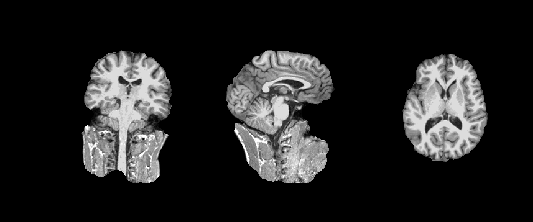

In [7]:
res.outputs
plot_anat('/autofs/homes/002/rje11/T1_skullstripped.nii.gz', display_mode='ortho', 
    dim=-1, draw_cross=False, annotate=False)


In [11]:
# how to automate the segmentation of of pial surface

# segment


Wraps command **bet**

FSL BET wrapper for skull stripping

For complete details, see the `BET Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET/UserGuide>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> btr = fsl.BET()
>>> btr.inputs.in_file = 'structural.nii'
>>> btr.inputs.frac = 0.7
>>> btr.inputs.out_file = 'brain_anat.nii'
>>> btr.cmdline
'bet structural.nii brain_anat.nii -f 0.70'
>>> res = btr.run() # doctest: +SKIP

Inputs::

	[Mandatory]
	in_file: (an existing file name)
		input file to skull strip
		flag: %s, position: 0

	[Optional]
	args: (a unicode string)
		Additional parameters to the command
		flag: %s
	center: (a list of at most 3 items which are an integer (int or
		 long))
		center of gravity in voxels
		flag: -c %s
	environ: (a dictionary with keys which are a bytes or None or a value
		 of class 'str' and with values which are a bytes or None or a value
		 of class 'str', nipype default value: {})
		Environment variables
	frac: (a float)
		